In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [76]:
data = pd.read_csv('house_prices.csv')

In [77]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [186]:
x = data[['bedrooms','sqft_living','waterfront','view','yr_renovated','lat','long','grade']]
x

,bedrooms,sqft_living,waterfront,view,yr_renovated,lat,long,grade
0,3,1180,0,0,0,47.5112,-122.257,7
1,3,2570,0,0,1991,47.7210,-122.319,7
2,2,770,0,0,0,47.7379,-122.233,6
3,4,1960,0,0,0,47.5208,-122.393,7
4,3,1680,0,0,0,47.6168,-122.045,8
...,...,...,...,...,...,...,...,...
21608,3,1530,0,0,0,47.6993,-122.346,8
21609,4,2310,0,0,0,47.5107,-122.362,8
21610,2,1020,0,0,0,47.5944,-122.299,7
21611,3,1600,0,0,0,47.5345,-122.069,8


In [187]:
y = data['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [188]:
# we use linear Regression + fit() method for training
model = LinearRegression()
model.fit(x,y) # by deafault 80/20 splited

LinearRegression()

In [189]:
# MSE and R value
#regression_model_mse = mean_squared_error(x, y)
#print("MSE: ", math.sqrt(regression_model_mse))
print("R square value: ",model.score(x,y))

R square value:  0.6669996774822023


In [190]:
# we can get the b values after the model fit
# this is b1
print(model.coef_)#slop
# This is b0 in our model
print('*********************')
print(model.intercept_)#intersept

[-2.73950371e+04  2.01076152e+02  5.77572705e+05  6.05635537e+04
  5.24110885e+01  6.31290021e+05 -2.32067312e+05  7.96921456e+04]
*********************
-58804985.21825286


In [191]:
x.head(2)

,bedrooms,sqft_living,waterfront,view,yr_renovated,lat,long,grade
0,3,1180,0,0,0,47.5112,-122.257,7
1,3,2570,0,0,1991,47.7210,-122.319,7


In [194]:
# predicting the price
print("Prediction by model: ", model.predict([[2,1100,0,0,2021,47,-122.00,8]]))

Prediction by model:  [87711.54715665]


In [195]:
len(model.predict(x))

21613

In [196]:
x

,bedrooms,sqft_living,waterfront,view,yr_renovated,lat,long,grade
0,3,1180,0,0,0,47.5112,-122.257,7
1,3,2570,0,0,1991,47.7210,-122.319,7
2,2,770,0,0,0,47.7379,-122.233,6
3,4,1960,0,0,0,47.5208,-122.393,7
4,3,1680,0,0,0,47.6168,-122.045,8
...,...,...,...,...,...,...,...,...
21608,3,1530,0,0,0,47.6993,-122.346,8
21609,4,2310,0,0,0,47.5107,-122.362,8
21610,2,1020,0,0,0,47.5944,-122.299,7
21611,3,1600,0,0,0,47.5345,-122.069,8


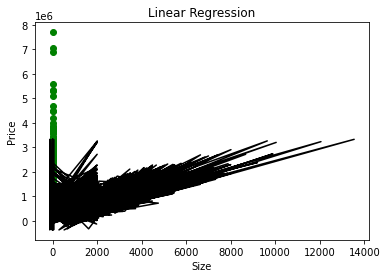

In [202]:
# visualize the data-set with the fitted model
plt.scatter(x['waterfront'],y,color="green")
plt.plot(x,model.predict(x),color="black")
plt.title("Linear Regression")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

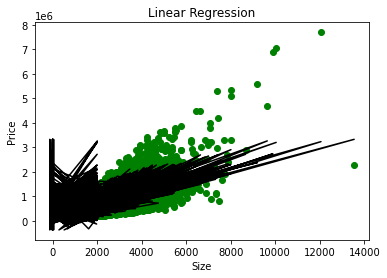

In [201]:
# visualize the data-set with the fitted model
plt.scatter(x['sqft_living'],y,color="green")
plt.plot(x,model.predict(x),color="black")
plt.title("Linear Regression")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

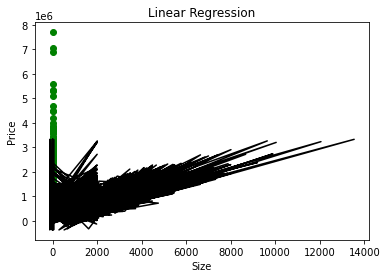

In [200]:
# visualize the data-set with the fitted model
plt.scatter(x['bedrooms'],y,color="green")
plt.plot(x,model.predict(x),color="black")
plt.title("Linear Regression")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()